In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/bigmart.xlsx',index_col=0)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


* Data Quality

  * data types
  * missing values
  * outliers
  * multicollinearity
  * Skewness

In [ ]:
df.shape

(8523, 13)

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,quantity_sold
0,9.30,0.016047,249.8092,1999,3735.1380,14
1,5.92,0.019278,48.2692,2009,443.4228,9
2,17.50,0.016760,141.6180,1999,2097.2700,14
3,19.20,0.000000,182.0950,1998,732.3800,4
4,8.93,0.000000,53.8614,1987,994.7052,18


In [ ]:
df_num = df.select_dtypes(exclude = 'number')
df_num.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DR,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FD,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FD,regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NC,low fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
(df.isna().sum()/len(df))*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,quantity_sold
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,14.932184
std,4.643456,0.051598,62.275067,8.371760,1706.499616,9.211566
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,8.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,21.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.000000


In [ ]:
df.select_dtypes(include='number').corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,quantity_sold
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,-0.011799
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.160790
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.011123
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,-0.074603
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.758565
quantity_sold,-0.011799,-0.160790,0.011123,-0.074603,0.758565,1.000000


<Axes: ylabel='Frequency'>

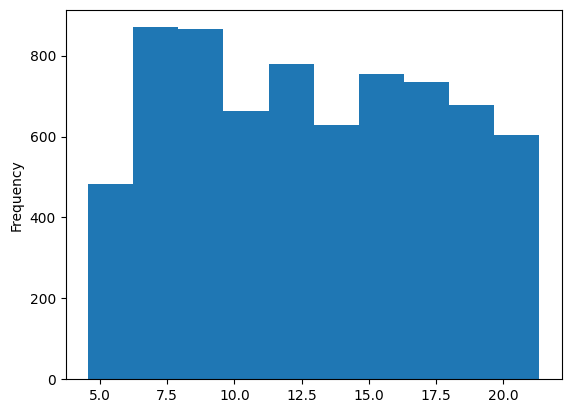

In [ ]:
df['Item_Weight'].plot.hist()

<Axes: ylabel='Frequency'>

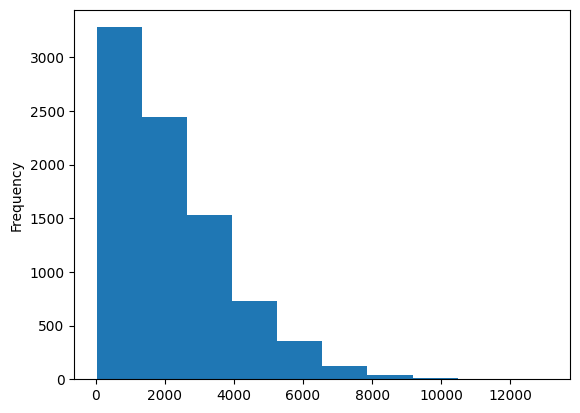

In [ ]:
df['Item_Outlet_Sales'].plot.hist()

*****
*****
**Analyse and preprocess the data**
****
****

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


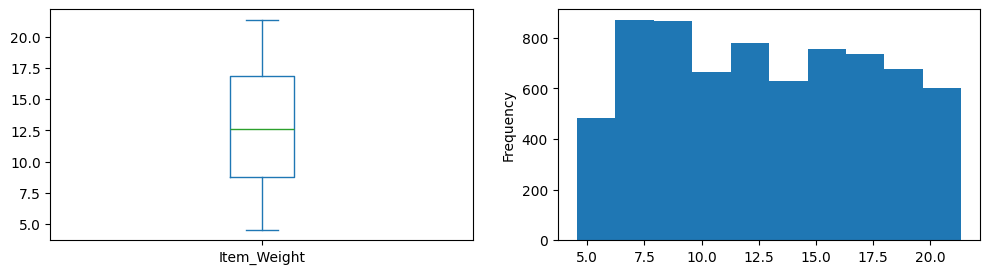

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
df['Item_Weight'].plot.box()

plt.subplot(1,2,2)
df['Item_Weight'].plot.hist()

plt.show()

**Analyse box blot**

In [ ]:
q1 = df['Item_Weight'].quantile(0.25)
q2 = df['Item_Weight'].quantile(0.50)
q3 = df['Item_Weight'].quantile(0.75)
print("Quantile 1-" ,q1)
print("Quantile 2-" ,q2)
print("Quantile 3-" ,q3)

Quantile 1- 8.77375
Quantile 2- 12.6
Quantile 3- 16.85


In [ ]:
#Range of most likelihood values

iqr = q3 - q1    #inter quantile range
print(iqr)

8.076250000000002


In [ ]:
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print("Upper fence" , upper_fence)
print("Lower fence" , lower_fence)

Upper fence 28.964375000000004
Lower fence -3.340625000000003


In [ ]:
#minimum value in the weight column within lower fence
df[df['Item_Weight'] > -3.34]['Item_Weight'].min()

4.555

In [ ]:
#maximum value in the weight column within upper fence
df[df['Item_Weight'] < 28.96]['Item_Weight'].max()

21.35

**Analyse Histogram**

In [ ]:
weight_mean = df['Item_Weight'].mean()
print(weight_mean)

12.857645184135976


**measure of dispersion**

  * variance - Measures how far a set of numbers are spread out of their mean
  * standard deviation - Square root of variance

In [ ]:
iw = df['Item_Weight']

variance_iw = ((iw - weight_mean)**2).mean()
print(variance_iw)

21.558634196343665


In [ ]:
std_dev_iw = np.sqrt(variance_iw)
print(std_dev_iw)

4.643127630847946


In [ ]:
#1st standard deviation range

left_hand_1std = weight_mean - std_dev_iw
right_hand_1std = weight_mean + std_dev_iw
print("1st std deviation range-", left_hand_1std, right_hand_1std)

1st std deviation range- 8.21451755328803 17.50077281498392


In [ ]:
((df['Item_Weight'] < 17.50) & (df['Item_Weight'] > 8.21)).sum()/len(df)

np.float64(0.46943564472603544)

In [ ]:
left_hand_2std = weight_mean - 2*std_dev_iw
right_hand_2std = weight_mean + 2*std_dev_iw
print("2nd std deviation range-", left_hand_2std, right_hand_2std)

2nd std deviation range- 3.5713899224400834 22.143900445831868


In [ ]:
left_hand_3std = weight_mean - 3*std_dev_iw
right_hand_3std = weight_mean + 3*std_dev_iw
print("3rd std deviation range-", left_hand_3std, right_hand_3std)

3rd std deviation range- -1.0717377084078628 26.787028076679814


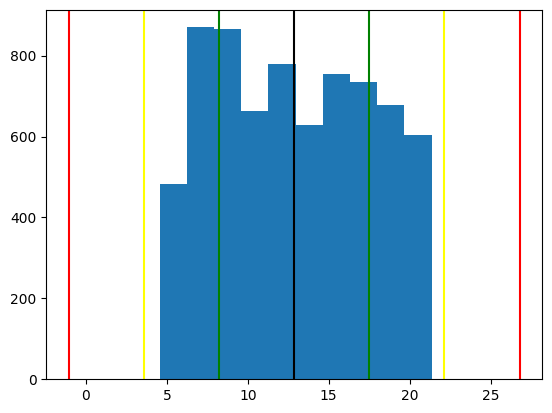

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Item_Weight'])
plt.axvline(x=weight_mean , c='black')

plt.axvline(x=8.21 , c='green')
plt.axvline(x=17.50 , c='green')

plt.axvline(x=3.57 , c='yellow')
plt.axvline(x=22.14 , c='yellow')

plt.axvline(x=-1.07 , c='red')
plt.axvline(x=26.79 , c='red')

plt.show()

In [ ]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


In [ ]:
#bivariate analysis => one categorical & one continous
#Average weights of 'FD' , 'DR' & 'NC'

df.groupby('Item_Identifier')['Item_Weight'].mean()

,Item_Weight
Item_Identifier,
DR,12.072348
FD,12.832186
NC,13.354532


In [ ]:
df.groupby('Item_Fat_Content')['Item_Weight'].mean()

,Item_Weight
Item_Fat_Content,
low fat,12.937387
regular,12.711654


In [ ]:
df.groupby('Item_Type')['Item_Weight'].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [ ]:
df.groupby('Item_Type')['Item_Weight'].mean()['Meat']

np.float64(12.81734421364985)

In [ ]:
#fill all missing weights with average weight
#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [ ]:
#fill the missing values with rhe average weight of 'Item_Type' for the sample where values are missing

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
7,FD,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,37
18,DR,NaN,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,20
21,FD,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,28
23,FD,NaN,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,1
29,FD,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DR,NaN,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,33
8487,DR,NaN,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,24
8488,NC,NaN,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,14
8490,FD,NaN,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,3


In [ ]:
def average_item_weight(item_type):
  return df.groupby('Item_Type')['Item_Weight'].mean()[item_type]

In [ ]:
average_item_weight('Soft Drinks')

np.float64(11.847459893048129)

In [ ]:
#apply a user defined function on a data column - apply()

df['Item_Type'].apply(average_item_weight).head(10)

,Item_Type
0,13.426069
1,11.847460
2,12.817344
3,13.224769
4,13.384736
5,12.277108
6,12.987880
7,12.987880
8,12.867061
9,12.867061


In [ ]:
#fill the missing values with average weight of crossponding item_type

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Type'].apply(average_item_weight))

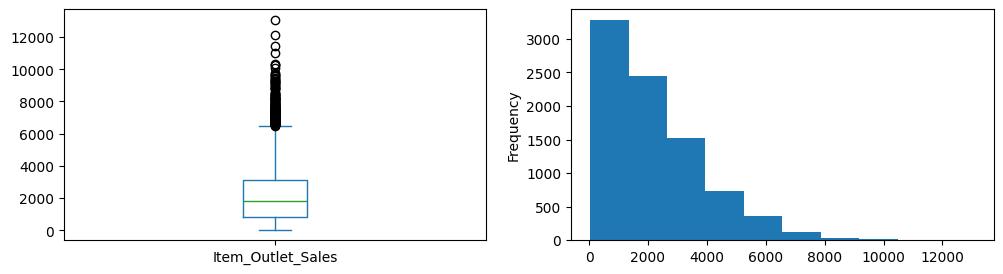

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
df['Item_Outlet_Sales'].plot.box()

plt.subplot(1,2,2)
df['Item_Outlet_Sales'].plot.hist()

plt.show()